In [8]:
from systems.parse import parse
from systems.viz import as_dot
from IPython.core.display import HTML
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
spec = """

[Candidate] > Recruiters(3, 7) @ 1

[Candidate] > Prospect    @ Recruiters * 3
Prospect    > Screen      @ 0.5
Screen      > Onsite      @ 0.5
Onsite      > Offer       @ 0.25
Offer       > Accept      @ 0.5
Accept      > Hired       @ 1.0

"""
model = parse(spec)

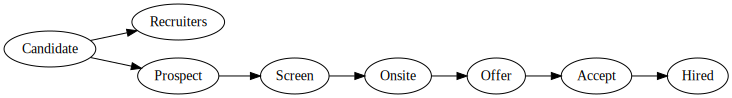

In [10]:
as_dot(model)

In [11]:
results = model.run(rounds=10)
rendered = model.render_html(results)
HTML(rendered)

Round,Recruiters,Prospect,Screen,Onsite,Offer,Accept,Hired
0,3,0,0,0,0,0,0
1,4,9,0,0,0,0,0
2,5,12,4,0,0,0,0
3,6,15,6,2,0,0,0
4,7,18,7,5,0,0,0
5,7,21,9,3,1,0,0
6,7,21,10,7,1,0,0
7,7,21,10,5,2,0,0
8,7,21,10,5,1,1,0
9,7,21,10,5,2,0,1


<Figure size 432x288 with 0 Axes>

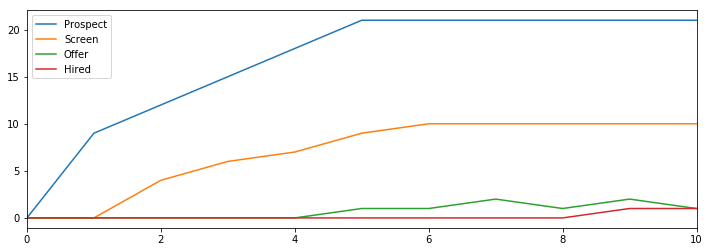

In [14]:
plt.close('all')
df = pd.DataFrame.from_records(results, columns=['Prospect', 'Screen', 'Offer', 'Hired'])
df.cumsum()
plt.figure();
df.plot(figsize=(12, 4));